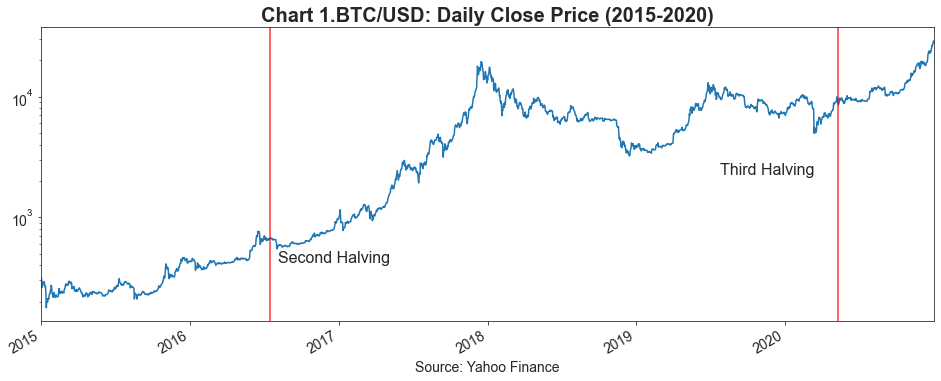

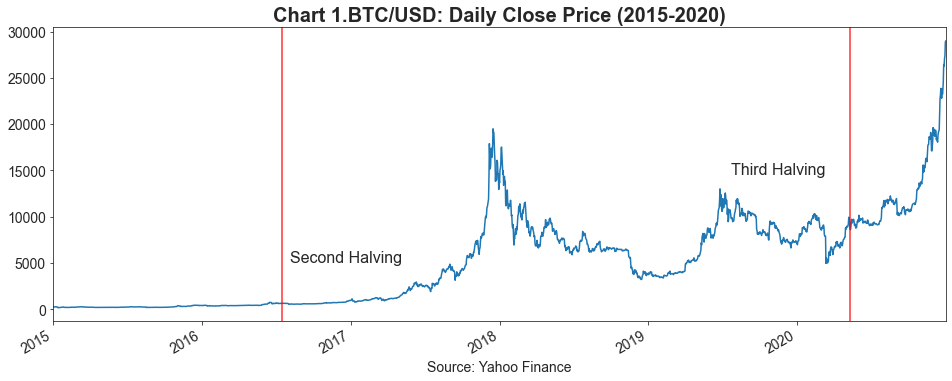

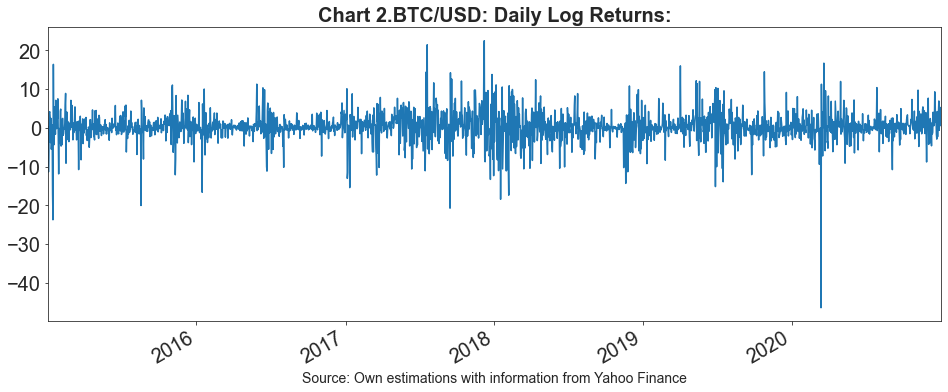

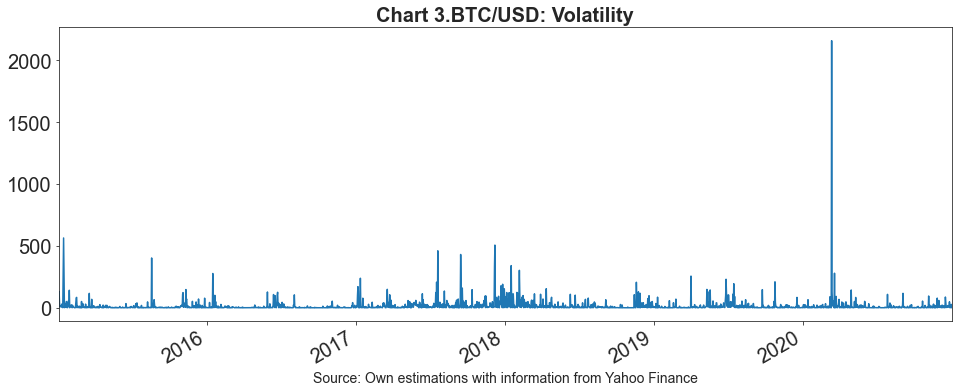

Date
2015-01-02     0.248862
2015-01-03   -11.402782
2015-01-04    -6.195895
2015-01-05     3.816904
2015-01-06     4.179588
                ...    
2020-12-27    -0.625099
2020-12-28     3.045804
2020-12-29     1.019818
2020-12-30     5.262518
2020-12-31     0.555880
Name: Adj Close, Length: 2187, dtype: float64


In [338]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

seaborn.set_style("ticks")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

import datetime as dt
import pandas as pd
data = pd.read_excel('D:\Documentos\BTC_USD\BTC_USD_day.xlsx',  parse_dates=['Date'], index_col='Date')

import numpy as np

close = data["Adj Close"]

#Addiional information for the chart
halv1 = pd.to_datetime('2016-7-16')
halv2 = pd.to_datetime('2020-5-11')
subtitle =("Source: Own estimations with information from Yahoo Finance")

g1   = close.plot(xlabel = 'Source: Yahoo Finance')
plt.margins(x=0)
plt.title('Chart 1.BTC/USD: Daily Close Price (2015-2020)', fontsize = 20, fontweight='bold')
plt.yscale('log')
#plt.xlabel = ('Source: Yahoo Finance')
plt.annotate('Second Halving', xy = (.265, .2), xycoords='axes fraction', fontsize = 16)
plt.annotate('Third Halving', xy = (.76, .5), xycoords='axes fraction', fontsize = 16)
plt.axvline(halv1,alpha=.8, color='red');
plt.axvline(halv2,alpha=.8, color='red');
plt.show()

g5   = close.plot(xlabel = 'Source: Yahoo Finance')
plt.margins(x=0)
plt.title('Chart 1.BTC/USD: Daily Close Price (2015-2020)', fontsize = 20, fontweight='bold')
#plt.xlabel = ('Source: Yahoo Finance')
plt.annotate('Second Halving', xy = (.265, .2), xycoords='axes fraction', fontsize = 16)
plt.annotate('Third Halving', xy = (.76, .5), xycoords='axes fraction', fontsize = 16)
plt.axvline(halv1,alpha=.8, color='red');
plt.axvline(halv2,alpha=.8, color='red');
plt.show()

close = close.dropna() 
l_re = np.log(close).diff().mul(100)
#l_re = np.log(close).diff().mul(100)
l_re = l_re.dropna() 



g2   = l_re.plot(title = 'BTC/USD: Daily Log Returns', xlabel=subtitle, fontsize = 20)
plt.margins(x=0)
plt.title('Chart 2.BTC/USD: Daily Log Returns:', fontsize = 20, fontweight='bold')
plt.show()

# Ploting the Volatility of the returns 
sq_r =l_re*l_re;

g3   = sq_r.plot(title = 'Chart 3.BTC/USD: Volatility', xlabel=subtitle, fontsize = 20)
plt.margins(x=0)
plt.title('Chart 3.BTC/USD: Volatility', fontsize = 20, fontweight='bold')
plt.show()

print(l_re)



In [3]:
conda install -c bashtage arch

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


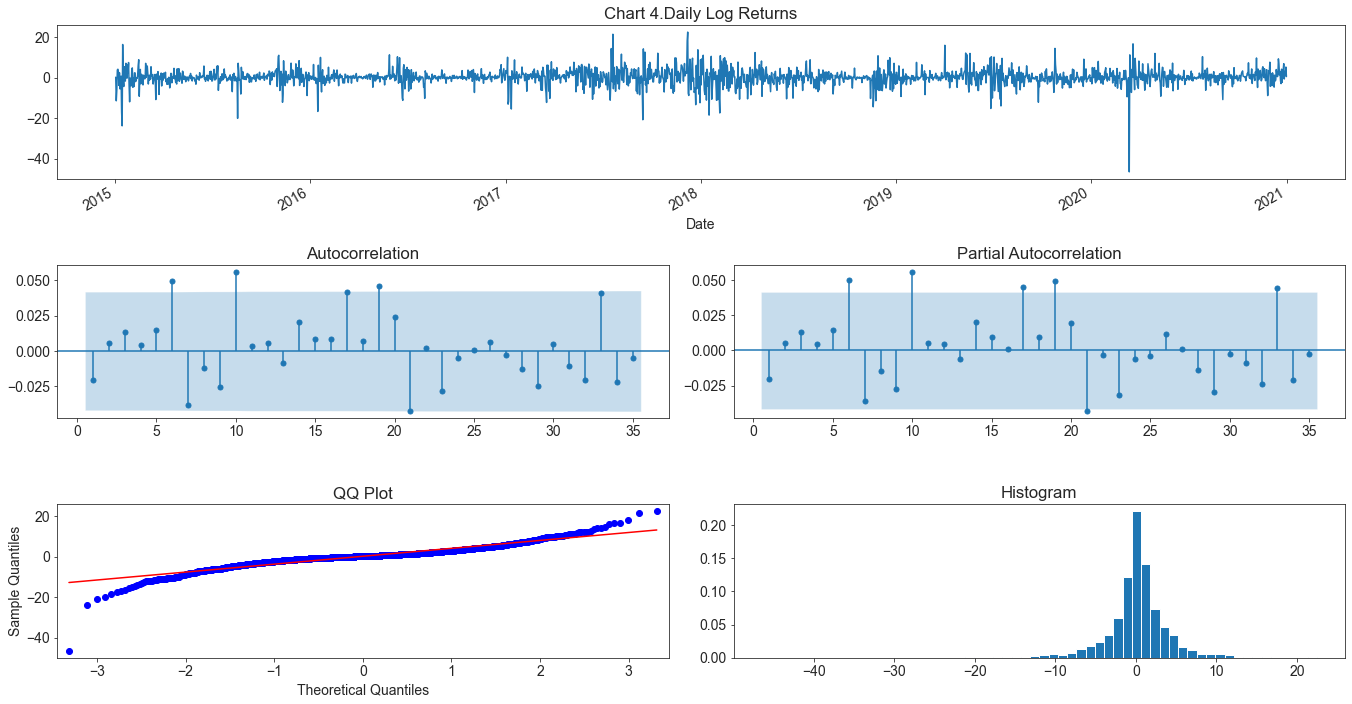

D:\anaconda\lib\site-packages\statsmodels\stats\diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "


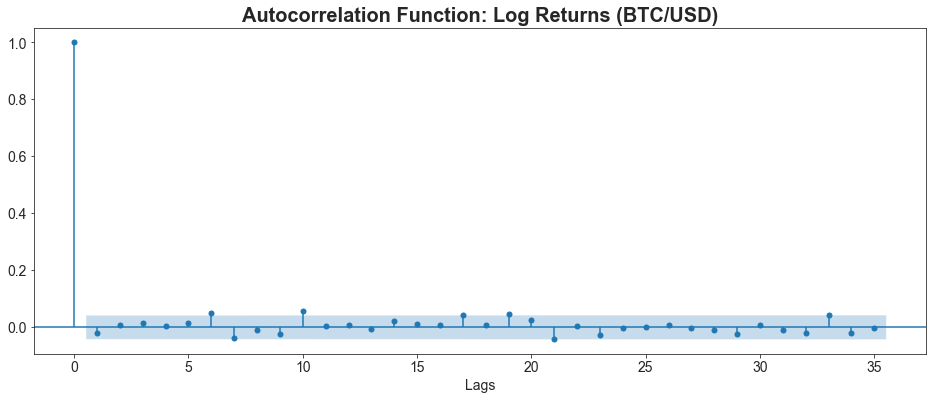

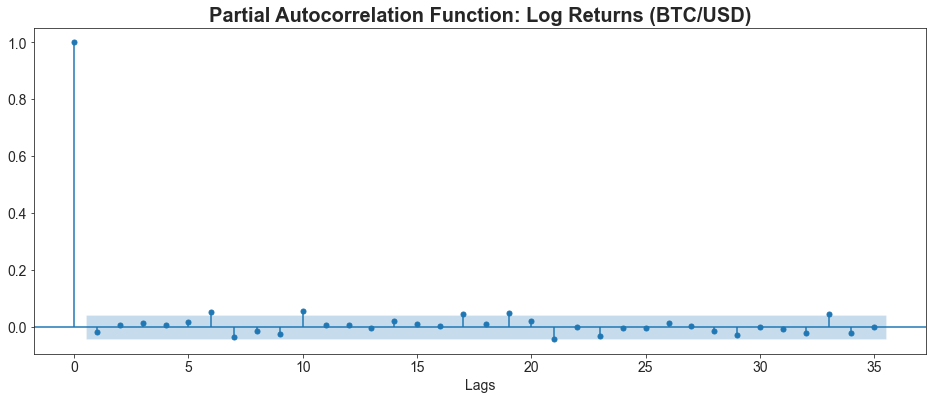

In [350]:
#--ARCH model 
import datetime as dt
from arch import arch_model
import statsmodels.api as sm
import statsmodels
import math 
import statistics
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#Preliminar Inspection 


def charts(y, figsize = (19, 10), title = "", lags = 35):
    tmp_data = pd.Series(y)
    fig = plt.figure(figsize = figsize)
    #Plot the time series
    tmp_data.plot(ax = fig.add_subplot(311), title =  title, legend = False)
    #Plot the ACF:
    sm.graphics.tsa.plot_acf(tmp_data, lags = lags, zero = False, ax = fig.add_subplot(323))
    #plt.xticks(np.arange(1,  lags+1, 1.0))
    #Plot the PACF:
    sm.graphics.tsa.plot_pacf(tmp_data, lags = lags, zero = False, ax = fig.add_subplot(324))
    #plt.xticks(np.arange(1,  lags+1, 1.0))
    #Plot the QQ plot of the data:
    sm.qqplot(tmp_data, line='s', ax = fig.add_subplot(325)) 
    plt.title("QQ Plot")
    #Plot the residual histogram:
    fig.add_subplot(326).hist(tmp_data, bins = 60,  density = 1)
    plt.title("Histogram")
    #Fix the layout of the plots:
    plt.tight_layout()
    plt.show()

#Here we can identify whether the log return variable presents serial correlation along the time
#Also can help to determine, at he begining, the number of MA and AR lags

charts(l_re, title ="Chart 4.Daily Log Returns")

#Note: The ACF and PACF plots of the Log-returns  significant autocorrelation along the sample of the variable

# Note: The plots from Square Log Returns

#-------------------Detecting ARCH effects in the return series 

#Squre residual of returns 


#Note: When a variable exhibits conditional heteroscedasticity, the square returns presents volatility clustering. This means 
# that large changes in the returns tend to cluster together, and small changes tend to also get together.

# Alog the sample, the ACF and the PACF plots disclose significant autocorrelation in the squared residual series. 
# This preliminar results suggest that the volatility clustering is presented in the residuals.
# Meaning that BTC/USD presents ARCH effects 

#-- Another way to identify the volatility clustering effects in the time series variables
#  is through the Ljung-Box Q-test and the Engle´s ARCH test. 

#------- Ljung-Box Q-test
#  Conducting the test on the squared residual series at lags 5, where:
# H0: The residual are independetly distributed
# H1: The residuals are not independently distributed, they exhibit serial correlation 
sm.stats.acorr_ljungbox(l_re, lags=None,  return_df=True)
sm.stats.acorr_ljungbox(sq_rr, lags=None,  return_df=True)


#------- Engle´s ARCH test
# The test will return a critical value, from a chi-square distribution, and F-statistic value, where:
# H0: Residuals exhibits no conditional heteroscedasticity (ARCH effects)
# H1: Indicates failure to reject the no ARCH effects null hypothesis. 

# Note: It is importnat higlight, that residuals in an ARCH process are dependent, but no correlated. 
# Thus Engle´s ARCH test assess for heteroscedasticity without autocorrelation. In order to seek for autocorrelation 
# the Ljung-Box Q-test has been used above. 
statsmodels.stats.diagnostic.het_arch(l_re, nlags=40, )
statsmodels.stats.diagnostic.het_arch(sq_rr, nlags=40, )




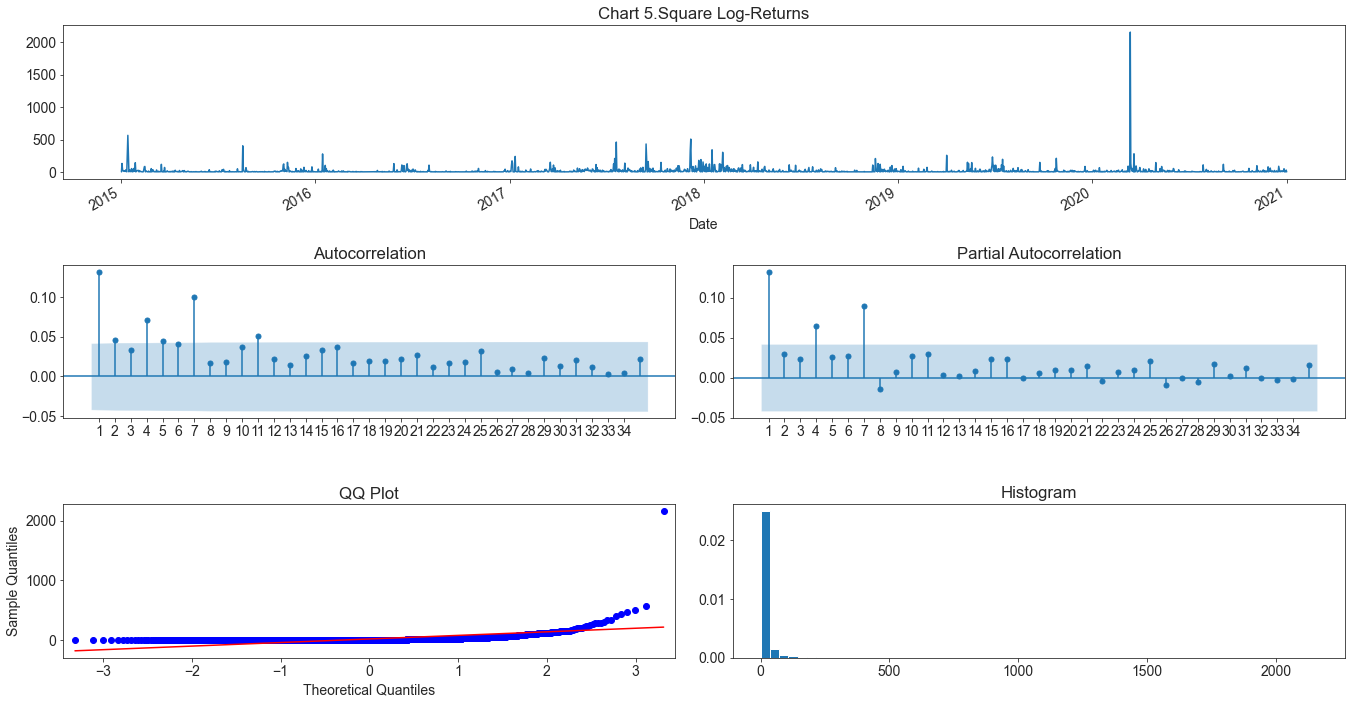

In [330]:
sq_r =l_re*l_re;
charts(sq_r, title ="Chart 5.Square Log-Returns")

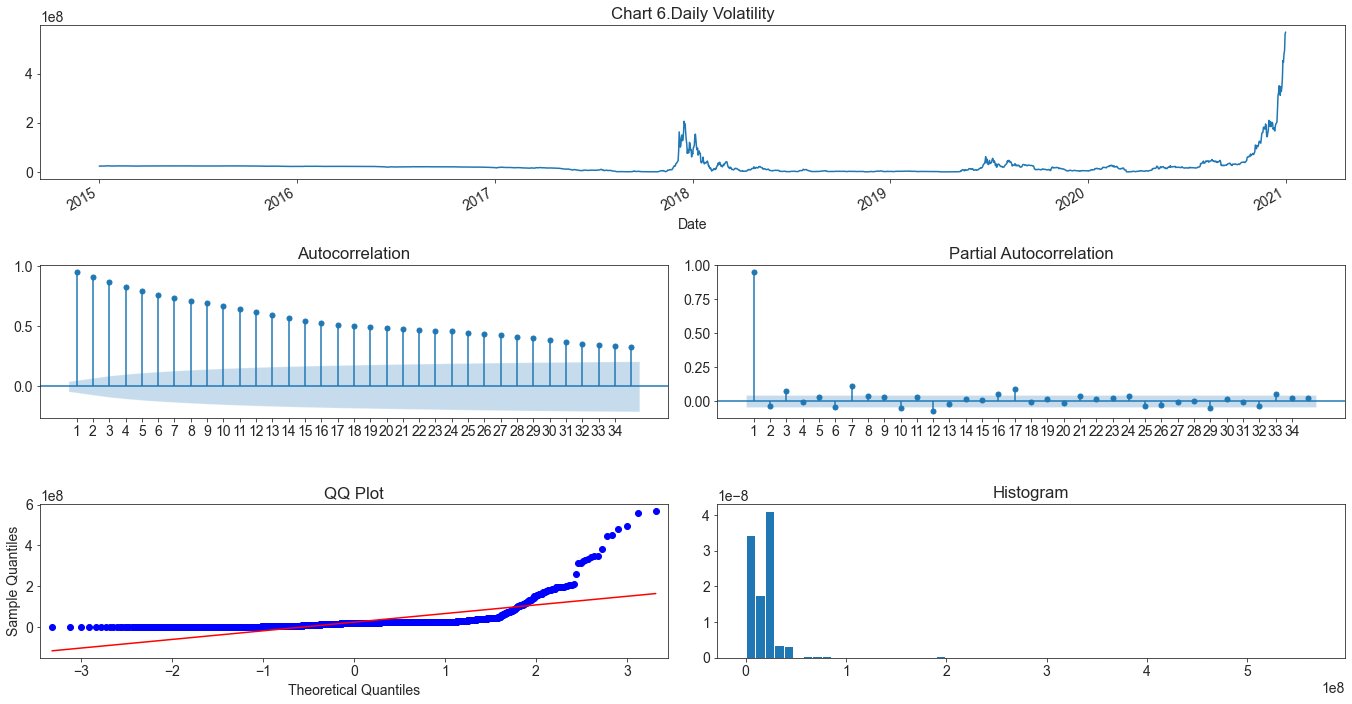

In [331]:
#pip install pmdarima --user
q_rr= close - statistics.mean(close)
sq_rr = q_rr*q_rr;
charts(sq_rr, title ="Chart 6.Daily Volatility")

In [14]:
import pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA


D:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

                              ARMA Model Results                              
Dep. Variable:              Adj Close   No. Observations:                 2187
Model:                     ARMA(1, 0)   Log Likelihood               -6084.592
Method:                       css-mle   S.D. of innovations              3.909
Date:                Fri, 28 May 2021   AIC                          12175.184
Time:                        01:57:13   BIC                          12192.254
Sample:                             0   HQIC                         12181.423
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2069      0.082      2.526      0.012       0.046       0.367
ar.L1.Adj Close    -0.0205      0.021     -0.957      0.339      -0.062       0.021
                                

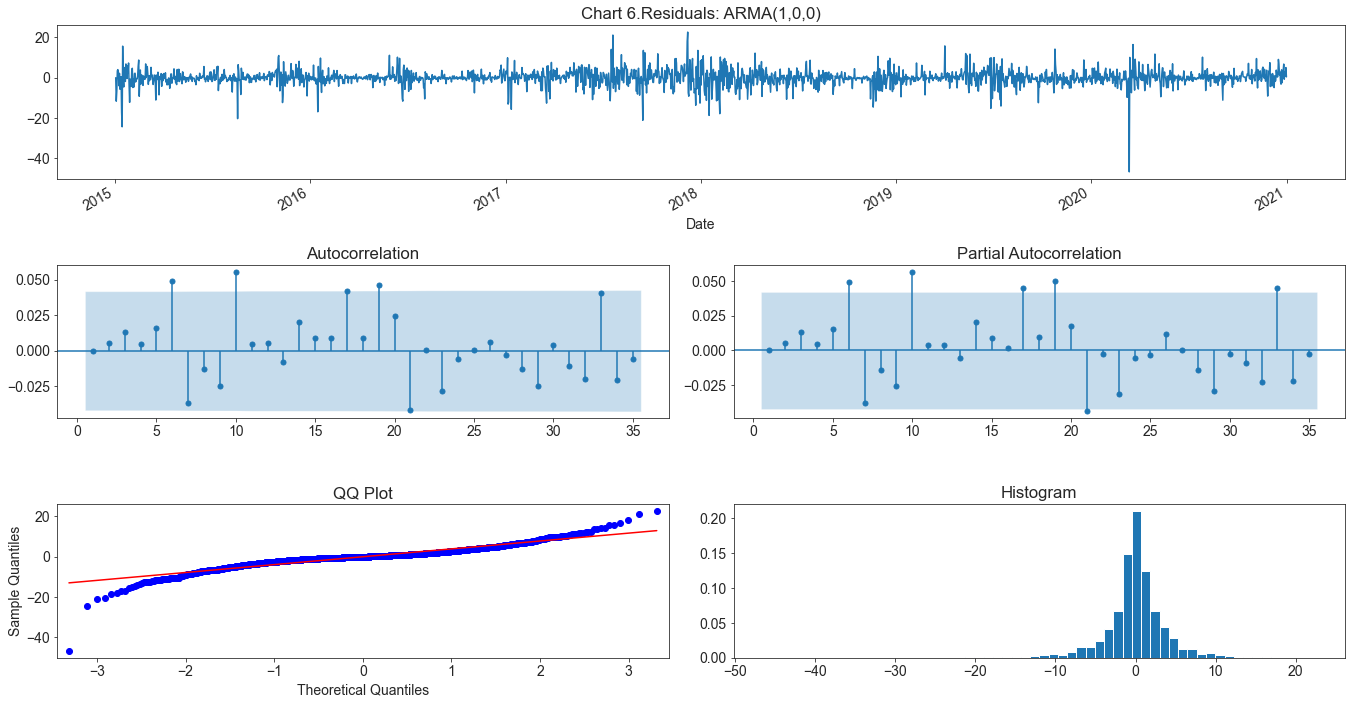

D:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

                              ARMA Model Results                              
Dep. Variable:              Adj Close   No. Observations:                 2187
Model:                     ARMA(1, 1)   Log Likelihood               -6084.579
Method:                       css-mle   S.D. of innovations              3.909
Date:                Fri, 28 May 2021   AIC                          12177.159
Time:                        01:57:14   BIC                          12199.920
Sample:                             0   HQIC                         12185.478
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2069      0.082      2.521      0.012       0.046       0.368
ar.L1.Adj Close    -0.1295      0.689     -0.188      0.851      -1.481       1.222
ma.L1.Adj Close     0.1090      

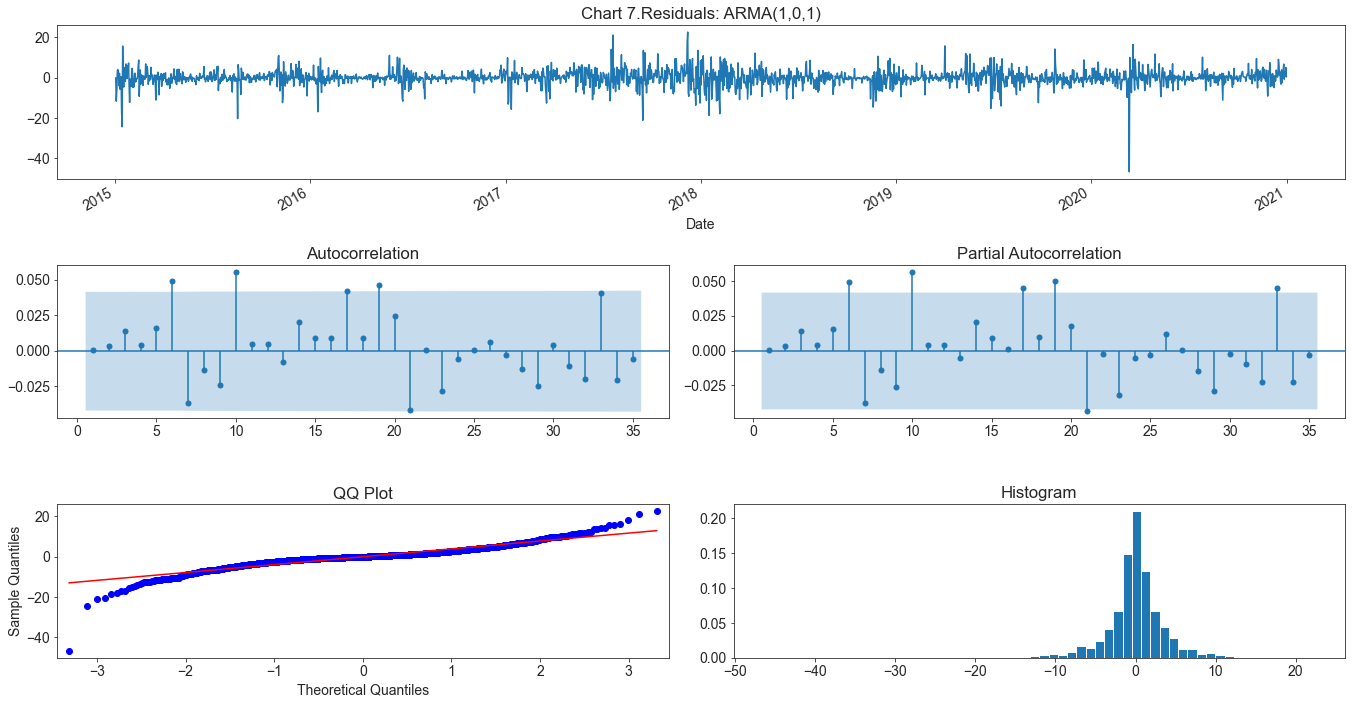

D:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

                              ARMA Model Results                              
Dep. Variable:              Adj Close   No. Observations:                 2187
Model:                     ARMA(0, 0)   Log Likelihood               -6085.050
Method:                           css   S.D. of innovations              3.910
Date:                Fri, 28 May 2021   AIC                          12174.099
Time:                        01:57:15   BIC                          12185.480
Sample:                             0   HQIC                         12178.259
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2069      0.084      2.475      0.013       0.043       0.371


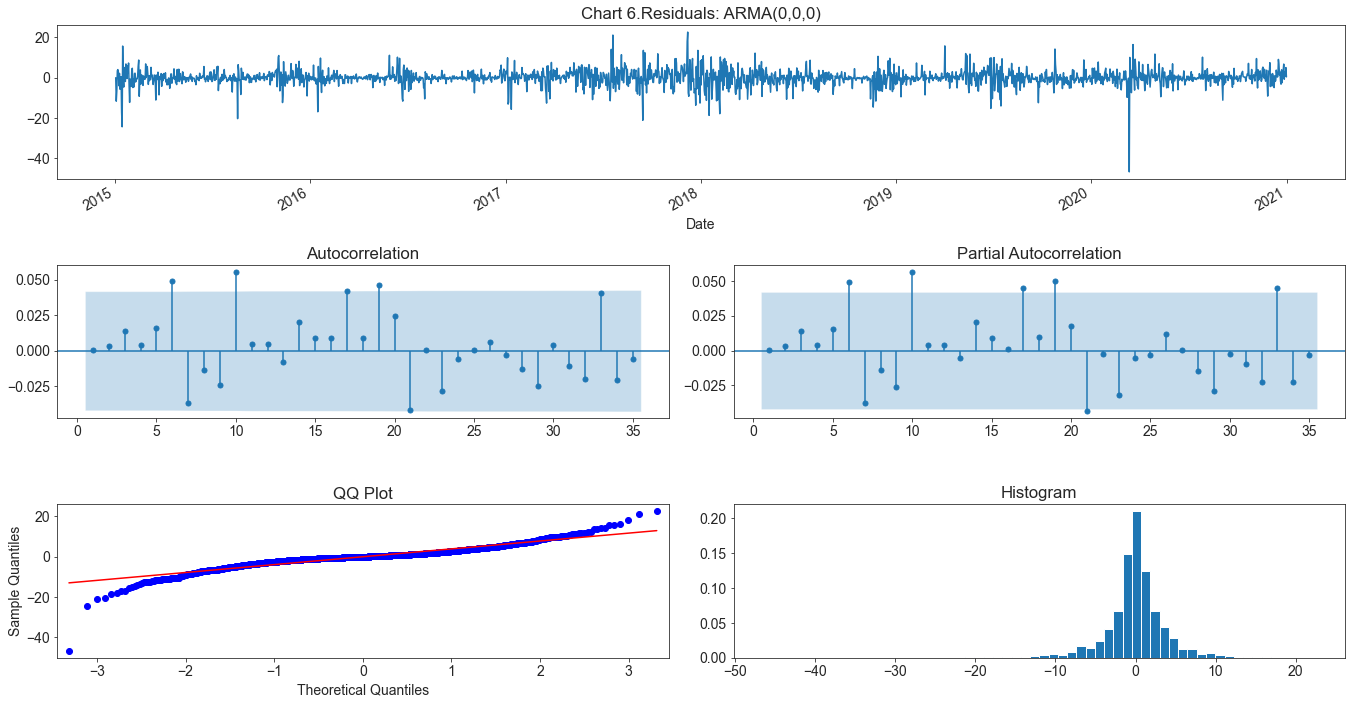

In [394]:
model = ARIMA(l_re, order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
res1 = model_fit.resid
charts(res1, title ="Chart 6.Residuals: ARMA(1,0,0)")

model1 = ARIMA(l_re, order=(1,0,1))
model_fit1 = model1.fit(disp=0)
print(model_fit1.summary())
res2 = model_fit1.resid
charts(res2, title ="Chart 7.Residuals: ARMA(1,0,1)")

model2 = ARIMA(l_re, order=(0,0,0))
model_fit2 = model2.fit(disp=0)
print(model_fit2.summary())
res3 = model_fit2.resid
charts(res2, title ="Chart 6.Residuals: ARMA(0,0,0)")

Performing stepwise search to minimize bic
 ARIMA(2,0,2)(0,0,0)[0]             : BIC=12213.691, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=12183.906, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : BIC=12190.918, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : BIC=12190.929, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : BIC=12198.557, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=12185.480, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.700 seconds
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.65989072141806e+17
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4762.940585111971
Iteration:      3,   Func. Count:     27,   Neg. LLF: 33156.36093403734
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4072.152107353073
Iteration:      5,   Func. Count:     43,   Neg. LLF: -3886.8915407317036
Iteration:      6,   Func. Count:     49,   Neg. LLF: -3378.320788607275
Iteration:      7,   Func. Count:     5

D:\anaconda\lib\site-packages\arch\univariate\base.py:292: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001528. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


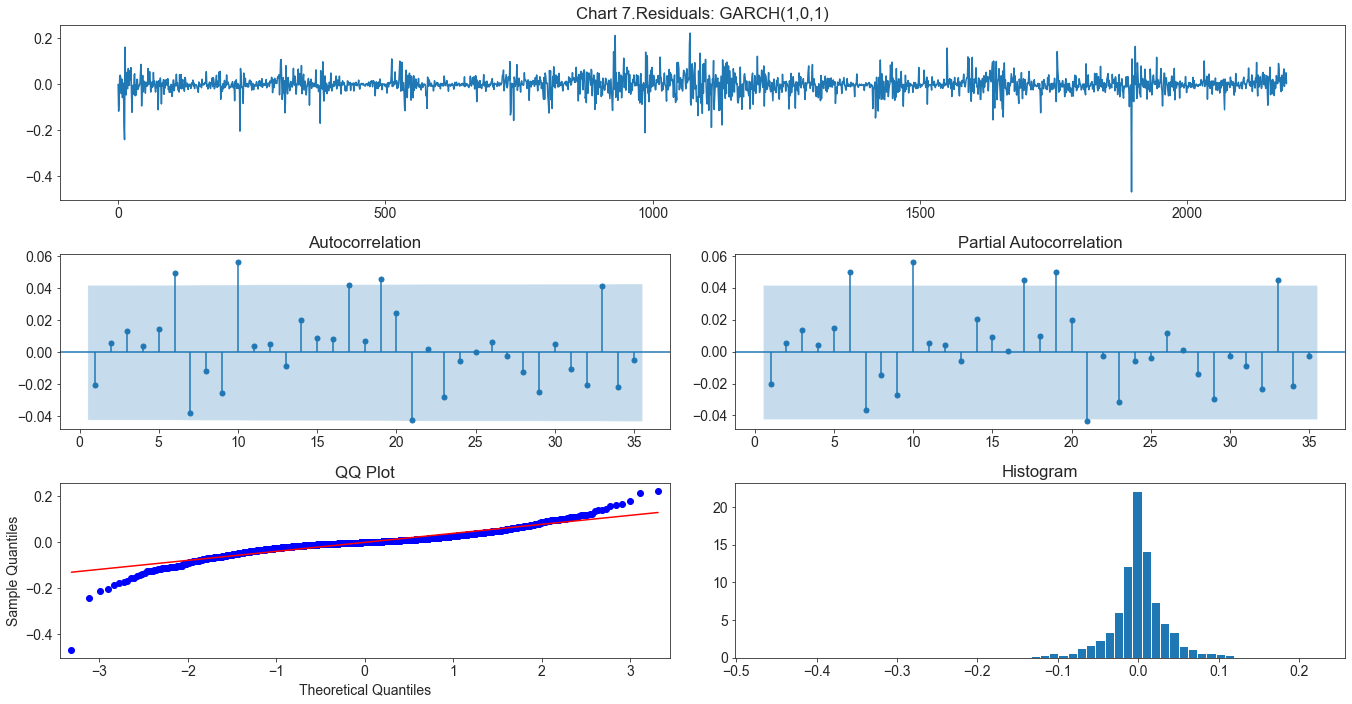

Iteration:      1,   Func. Count:      8,   Neg. LLF: 10635.3307608143
Iteration:      2,   Func. Count:     17,   Neg. LLF: 7138.591972134629
Iteration:      3,   Func. Count:     26,   Neg. LLF: 6130.458539231324
Iteration:      4,   Func. Count:     35,   Neg. LLF: 6034.799923185807
Iteration:      5,   Func. Count:     43,   Neg. LLF: 5870.352478969176
Iteration:      6,   Func. Count:     51,   Neg. LLF: 5855.1750395652025
Iteration:      7,   Func. Count:     59,   Neg. LLF: 5866.5248810346375
Iteration:      8,   Func. Count:     67,   Neg. LLF: 5845.846720562116
Iteration:      9,   Func. Count:     74,   Neg. LLF: 5845.556006670626
Iteration:     10,   Func. Count:     81,   Neg. LLF: 5845.353819473826
Iteration:     11,   Func. Count:     88,   Neg. LLF: 5845.3284085822925
Iteration:     12,   Func. Count:     95,   Neg. LLF: 5845.3111570251485
Iteration:     13,   Func. Count:    102,   Neg. LLF: 26588.606804605355
Iteration:     14,   Func. Count:    112,   Neg. LLF: 5936.0

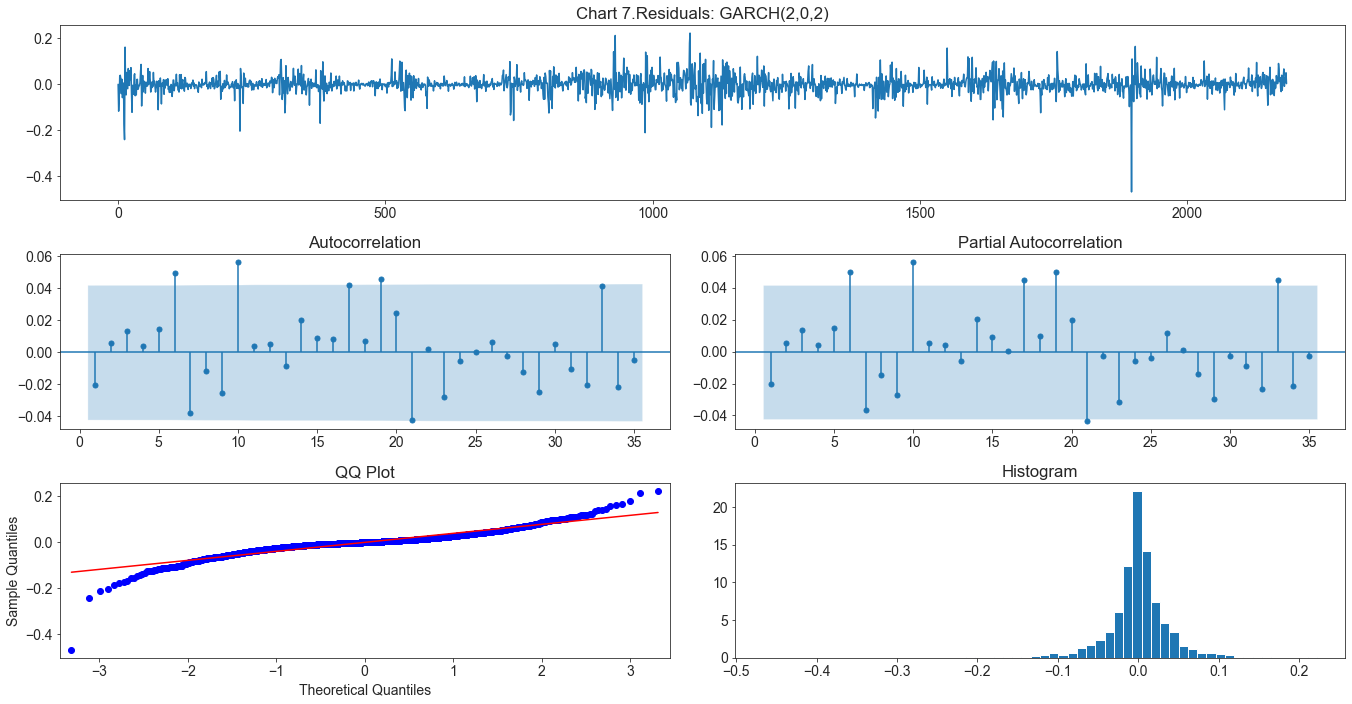

                   0
2015-01-02  0.001175
2015-01-03 -1.743120
2015-01-04 -0.841973
2015-01-05  0.483225
2015-01-06  0.572817
...              ...
2020-12-23 -0.198863
2020-12-24  0.695853
2020-12-25  0.199932
2020-12-26  1.382253
2020-12-27  0.080267

[2187 rows x 1 columns]


In [401]:

#########################################################################################################
                                #### ARMA-GARCH Model
#  -----Fisrt: Auto Arima 

au_gm = auto_arima(l_re,

d=0, # non-seasonal difference order
min_p=1, # initial guess for p
min_q=1, # initial guess for q
max_p=20, # max value of p to test
max_q=20, # max value of q to test                        
                    
seasonal=False, # is the time series seasonal
                    
information_criterion='bic', # used to select best model
trace=True, # print results whilst training
error_action='ignore', # ignore orders that don't work
stepwise=True, # apply intelligent order search
                        
)


garch1 = arch.arch_model(l_re, vol="Garch", p=1, o=0, q=1, dist="Normal")
garch1_fitted = garch.fit()
print(garch_fitted.summary())
# Obtain model estimated residuals and volatility
garch_resid1 = garch_fitted.resid
garch_std1 = garch_fitted.conditional_volatility

charts(garch_resid1, title ="Chart 7.Residuals: GARCH(1,0,1)")


garch2 = arch.arch_model(l_re, vol="Garch", p=2, o=0, q=2, dist="Normal")
garch2_fitted = garch2.fit()
print(garch2_fitted.summary())
# Obtain model estimated residuals and volatility
garch_resid2 = garch2_fitted.resid
garch_std2 = garch2_fitted.conditional_volatility

charts(garch_resid1, title ="Chart 7.Residuals: GARCH(2,0,2)")



# Calculating the standardized residuals
garch_std_resid1 = garch_resid /garch_std
idx = pd.date_range('2015-01-02', periods=2187, freq='D')
#s_r = pd.DataFrame(garch_std_resid1, columns=['standardized residuals'], index=idx)
s_r = pd.DataFrame(garch_std_resid1, index=idx)
# Chart Comparations
#plt.plot(sq_r, color = 'red' ,alpha = 0.4, label = 'Price Volatility')
# Plot GJR-GARCH estimated volatility
#plt.plot(s_r, color = 'blue', label = 'ARMA-GARCH Volatility')
#plt.legend(loc = 'upper right')
#plt.show()
#c_v1 = pd.DataFrame({"Daily Volatility": [sq_rr] , "ARMA-GARCH Volatility": [s_r]})

print (s_r)







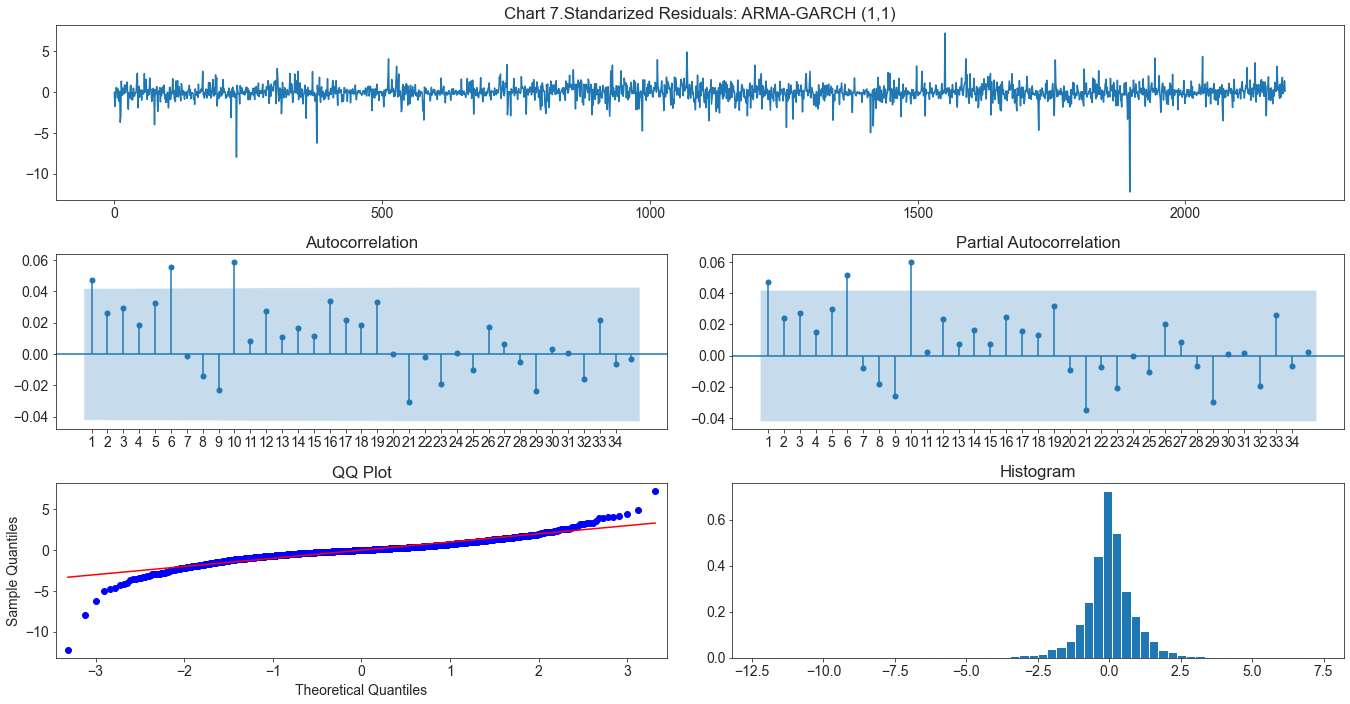

[ 1.17465032e-03 -1.74311953e+00 -8.41973102e-01 ...  1.99931787e-01
  1.38225299e+00  8.02668895e-02]


In [332]:
charts(garch_std_resid1, title ="Chart 7.Standarized Residuals: ARMA-GARCH (1,1)")
print(garch_std_resid1)


                        Constant Mean - GARCH Model Results                         
Dep. Variable:                    Adj Close   R-squared:                      -0.000
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                            GARCH   Log-Likelihood:               -5482.14
Distribution:      Standardized Student's t   AIC:                           10974.3
Method:                  Maximum Likelihood   BIC:                           11002.7
                                              No. Observations:                 2187
Date:                      Fri, May 28 2021   Df Residuals:                     2182
Time:                              03:33:59   Df Model:                            5
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0

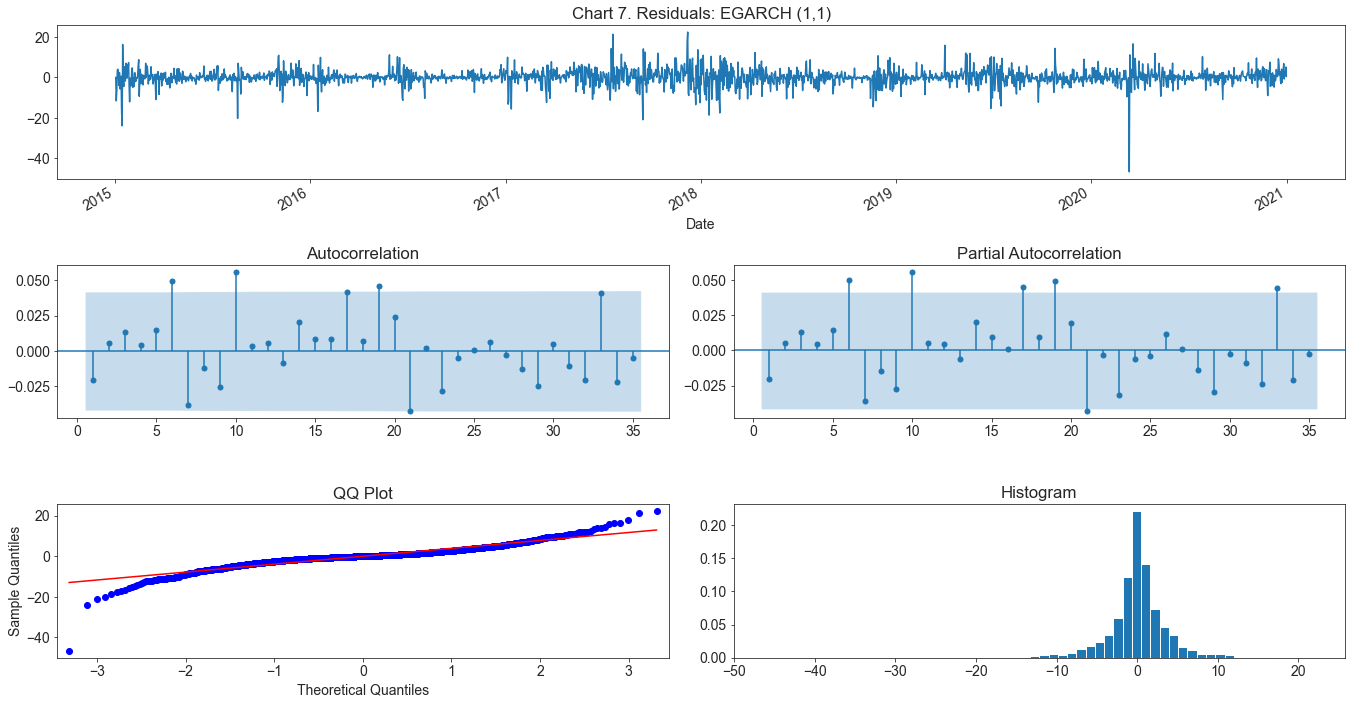

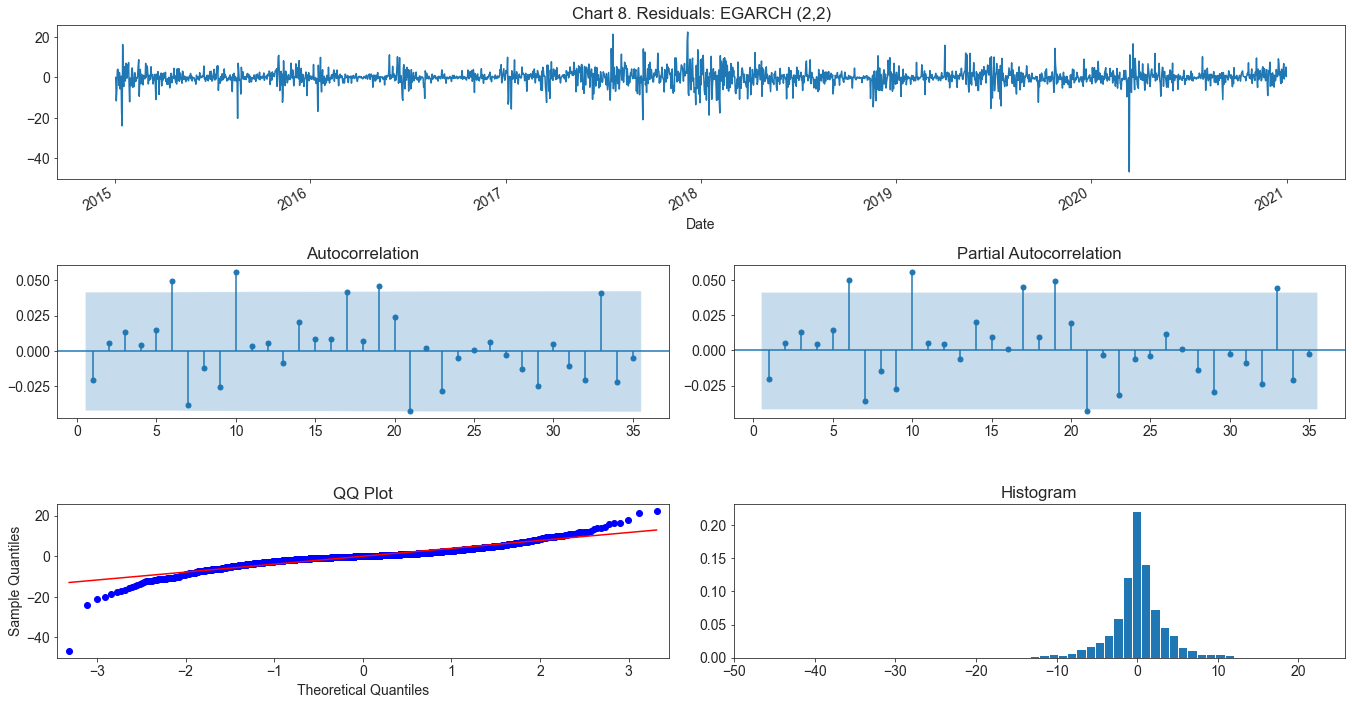

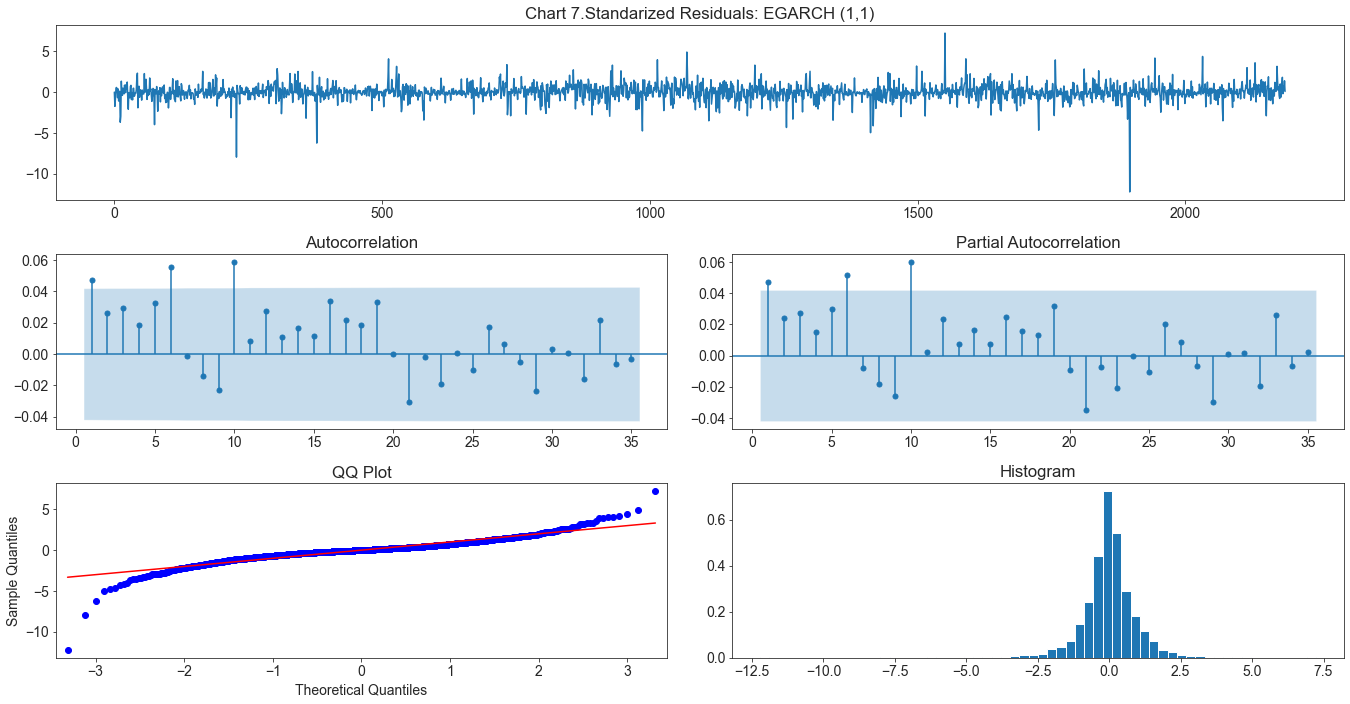

In [404]:
# ------------ Alternative Models


# -----Specify GJR-GARCH model assumptions
g_gm = arch_model(l_re, p = 1, q = 1, o = 0, vol = 'GARCH', dist = 't')

# Fit the model
ggm_r_f = g_gm.fit(disp = 'off')

# Print model fitting summary
print(ggm_r_f.summary())

ggm_resids = ggm_r_f.resid
ggm_std    = ggm_r_f.conditional_volatility
# Calculating the standardized residuals
ggm_std_resid = ggm_resids /ggm_std
s_r_ggm = pd.DataFrame(ggm_std_resid, index=idx)


# ------Specify EGARCH model assumptions
e_gm = arch_model(l_re, p = 1, q = 1, o = 0, vol = 'EGARCH', dist = 't')
e_gm1 = arch_model(l_re, p = 2, q = 2, o = 0, vol = 'EGARCH', dist = 't')
# Fit the model
egarch_r_f = e_gm.fit(disp = 'off')
egarch1_r_f = e_gm1.fit(disp = 'off')
# Print model fitting summary
print(egarch_r_f.summary())
print(egarch1_r_f.summary())
egarch_resids = egarch_r_f.resid
egarch_std    = egarch_r_f.conditional_volatility
egarch1_resids = egarch1_r_f.resid
egarch1_std    = egarch1_r_f.conditional_volatility

charts(egarch_resids, title ="Chart 7. Residuals: EGARCH (1,1)")
charts(egarch1_resids, title ="Chart 8. Residuals: EGARCH (2,2)")

# Calculating the standardized residuals
egarch_std_resid = egarch1_resids /egarch1_std
s_r_egarch = pd.DataFrame(egarch_std_resid, index=idx)
charts(garch_std_resid1, title ="Chart 7.Standarized Residuals: EGARCH (1,1)")

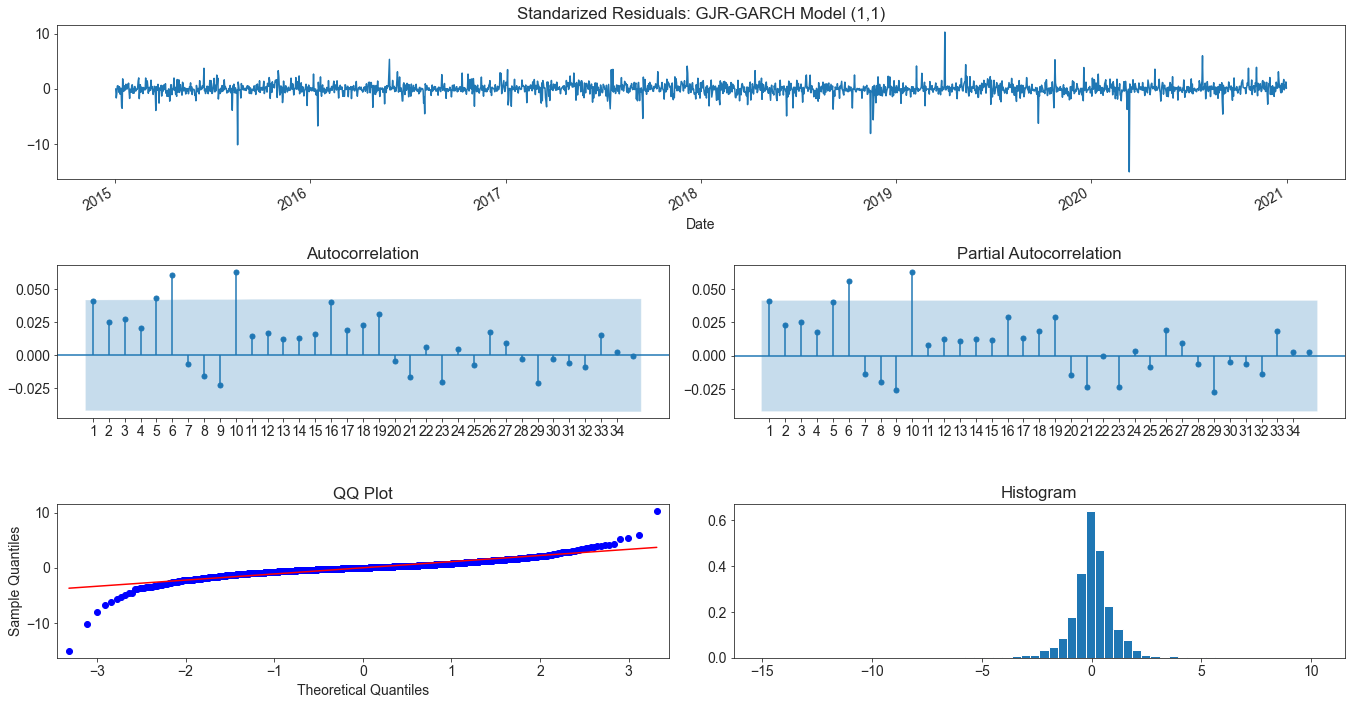

In [314]:
# Model Checking GJR-GARCH and EGARCH 

#-- Visual inspection
charts(ggm_std_resid, title ="Standarized Residuals: GJR-GARCH Model (1,1)")



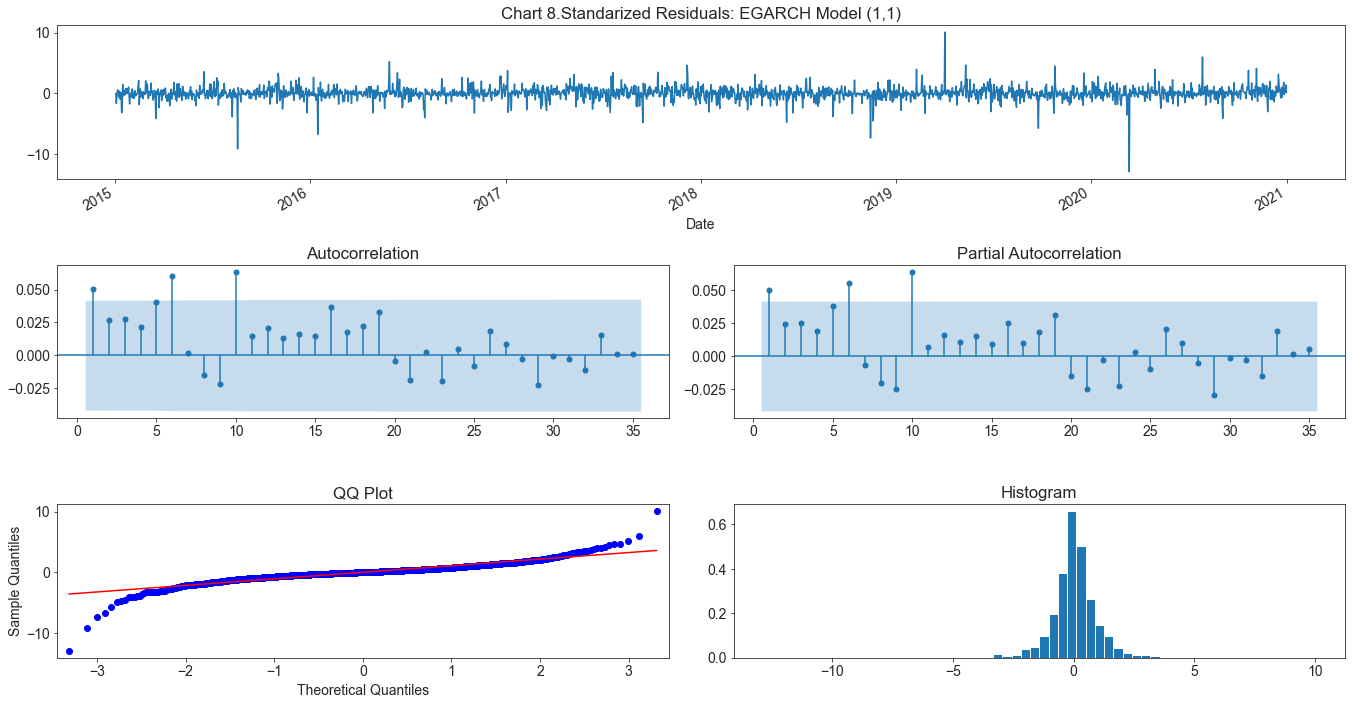

In [361]:
charts(egarch_std_resid, title ="Chart 8.Standarized Residuals: EGARCH Model (1,1)")

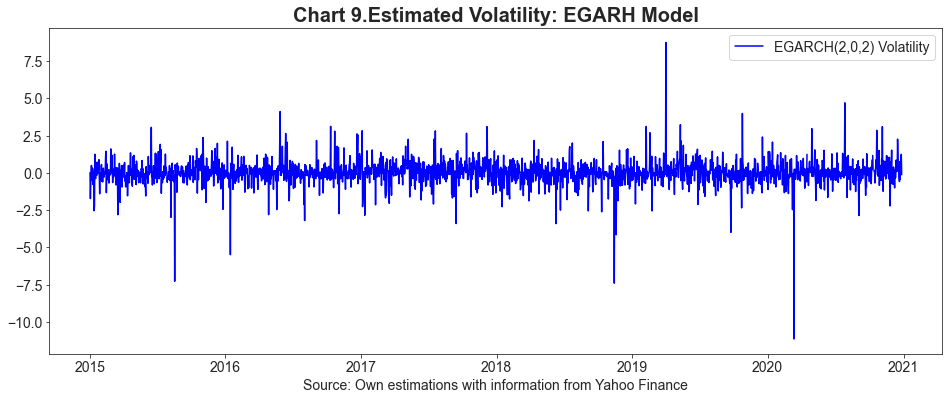

In [406]:
# Plot EGARCH  estimated volatility
plt.plot(s_r_egarch, color = 'blue', label = 'EGARCH(2,0,2) Volatility')

plt.legend(loc = 'upper right')
plt.title('Chart 9.Estimated Volatility: EGARH Model', fontsize = 20, fontweight='bold')
plt.xlabel (subtitle)


plt.show()

In [407]:
# Computing 1-step to 5-step ahead mean and volatility forecast of the ARCH and the EGARCH model.
import sys

# Sample, estimation sample, Forecast sample

# Fisrt for ARCH model

forecasts1 = garch1_fitted.forecast(horizon=5)
print(forecasts.mean.iloc[-5:])
print(forecasts.residual_variance.iloc[-5:])
print(forecasts.variance.iloc[-5:])





           h.1       h.2       h.3       h.4       h.5
2182       NaN       NaN       NaN       NaN       NaN
2183       NaN       NaN       NaN       NaN       NaN
2184       NaN       NaN       NaN       NaN       NaN
2185       NaN       NaN       NaN       NaN       NaN
2186  0.000333  0.000333  0.000333  0.000333  0.000333
           h.1       h.2       h.3       h.4       h.5
2182       NaN       NaN       NaN       NaN       NaN
2183       NaN       NaN       NaN       NaN       NaN
2184       NaN       NaN       NaN       NaN       NaN
2185       NaN       NaN       NaN       NaN       NaN
2186  0.001333  0.001369  0.001404  0.001438  0.001471
           h.1       h.2       h.3       h.4       h.5
2182       NaN       NaN       NaN       NaN       NaN
2183       NaN       NaN       NaN       NaN       NaN
2184       NaN       NaN       NaN       NaN       NaN
2185       NaN       NaN       NaN       NaN       NaN
2186  0.001333  0.001369  0.001404  0.001438  0.001471


In [408]:
#

forecasts2 = ggm_r_f.forecast(horizon=5)
print(forecasts.mean.iloc[-5:])
print(forecasts.residual_variance.iloc[-5:])
print(forecasts.variance.iloc[-5:])


           h.1       h.2       h.3       h.4       h.5
2182       NaN       NaN       NaN       NaN       NaN
2183       NaN       NaN       NaN       NaN       NaN
2184       NaN       NaN       NaN       NaN       NaN
2185       NaN       NaN       NaN       NaN       NaN
2186  0.000333  0.000333  0.000333  0.000333  0.000333
           h.1       h.2       h.3       h.4       h.5
2182       NaN       NaN       NaN       NaN       NaN
2183       NaN       NaN       NaN       NaN       NaN
2184       NaN       NaN       NaN       NaN       NaN
2185       NaN       NaN       NaN       NaN       NaN
2186  0.001333  0.001369  0.001404  0.001438  0.001471
           h.1       h.2       h.3       h.4       h.5
2182       NaN       NaN       NaN       NaN       NaN
2183       NaN       NaN       NaN       NaN       NaN
2184       NaN       NaN       NaN       NaN       NaN
2185       NaN       NaN       NaN       NaN       NaN
2186  0.001333  0.001369  0.001404  0.001438  0.001471


In [357]:
sm.stats.acorr_ljungbox(sq_r, lags=None,  return_df=True)

D:\anaconda\lib\site-packages\statsmodels\stats\diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "


,lb_stat,lb_pvalue
1,38.316846,6.014122e-10
2,42.953619,4.706955e-10
3,45.323940,7.896210e-10
4,56.431913,1.627743e-11
5,60.726112,8.602954e-12
6,64.304410,5.982250e-12
7,86.581734,6.217883e-16
8,87.203876,1.715904e-15
9,87.894013,4.303548e-15
10,90.937525,3.490125e-15


In [355]:
statsmodels.stats.diagnostic.het_arch(sq_r, nlags=40,  store=True )

(0.6188023197772611,
 1.0,
 0.015179010220308724,
 0.9999999999999999,
 <statsmodels.stats.diagnostic.ResultsStore at 0x1d5b1632e20>)